In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_3.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 1.
part_sd = 1.

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

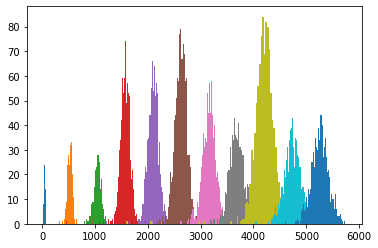

In [3]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [4]:
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

mus = {}
delta_mus = {}

In [5]:
def proc_calibration(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy[number]
    n, bins, patches = plt.hist(data[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    mus[en] = mu
    delta_mus[en] = delta_mu
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))

mu = 46.68266582021092 +- 0.5327544194767034
sigma = 14.414343876257268 +- 0.4228435603737729
nevents = 797.6077385784478 +- 27.74974568760891


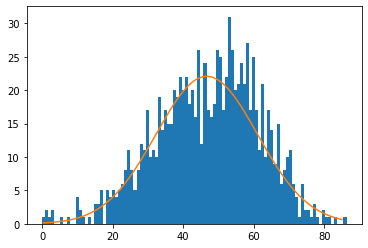

In [18]:
proc_calibration(0, 100, [30, 15, 10000])

mu = 524.6399143068414 +- 1.6860864055281901
sigma = 48.1065966086802 +- 1.3974341483766815
nevents = 3286.3320853366304 +- 109.58025987828803


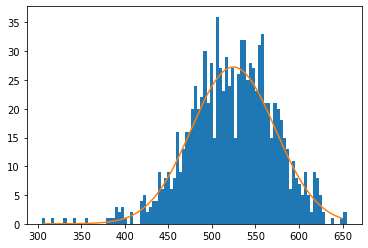

In [8]:
proc_calibration(1, 100, [550, 50, 10000])

mu = 1051.7078965015398 +- 2.531709851588622
sigma = 63.952391627884495 +- 2.0827174632520675
nevents = 4470.210746716685 +- 172.11796151545113


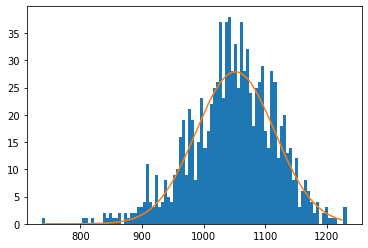

In [11]:
proc_calibration(2, 100, [1100, 70, 10000])

mu = 1575.9159831201666 +- 2.3380330013381756
sigma = 83.46861036728245 +- 1.7983069513798964
nevents = 13508.52456461565 +- 371.42198421882193


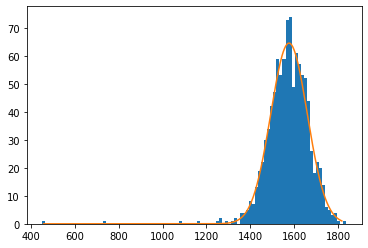

In [12]:
proc_calibration(3, 100, [1500, 100, 10000])

mu = 2104.7358974753392 +- 2.7949070561231792
sigma = 95.46757425118507 +- 2.074854445634965
nevents = 14377.530762186916 +- 416.82435097066906


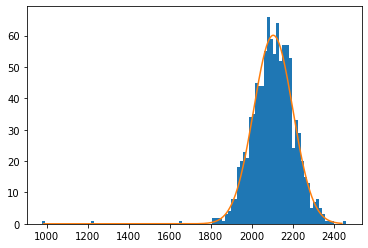

In [15]:
proc_calibration(4, 100, [2100, 100, 10000])

mu = 2653.033180951295 +- 7.195951548794336
sigma = 117.20769765388647 +- 5.445054376094868
nevents = 19137.558993213945 +- 1255.9563776145503


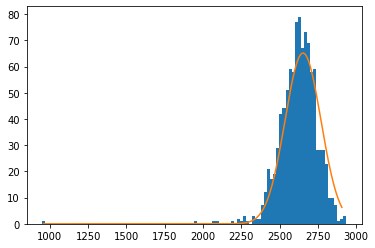

In [17]:
proc_calibration(5, 100, [2600, 100, 10000])

mu = 3166.0780494098076 +- 3.678028220662016
sigma = 112.1303567818195 +- 2.766953221640447
nevents = 13864.749232169852 +- 450.5051941112273


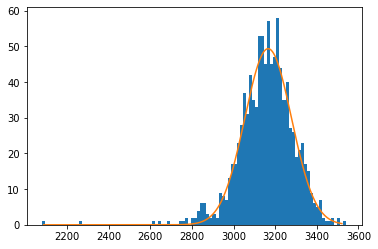

In [19]:
proc_calibration(6, 100, [3000, 120, 10000])

mu = 3680.138310120538 +- 3.849734930266861
sigma = 129.62896846038225 +- 3.0332608324967607
nevents = 12286.795170743017 +- 358.47638104805543


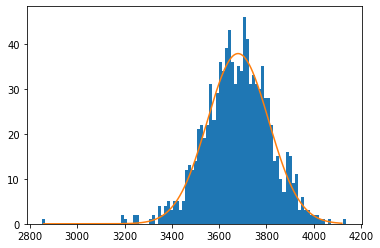

In [20]:
proc_calibration(7, 100, [3500, 120, 10000])

mu = 4205.883768256425 +- 4.425060099894921
sigma = 145.39299194233396 +- 3.27450904101918
nevents = 29506.796458575824 +- 880.5012276288617


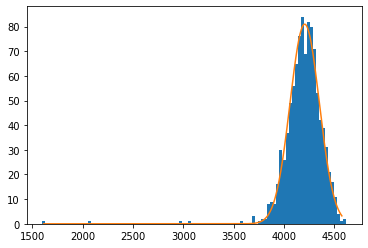

In [21]:
proc_calibration(8, 100, [4000, 140, 10000])

mu = 4736.554181299356 +- 4.443200403528399
sigma = 148.8199373560937 +- 3.5332631689239022
nevents = 11781.972652491217 +- 342.10680583759677


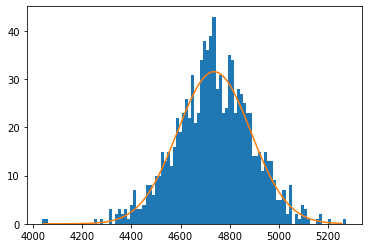

In [23]:
proc_calibration(9, 100, [4700, 150, 10000])

mu = 5260.720443626686 +- 4.326671803092686
sigma = 152.61960444669072 +- 3.4407983174169
nevents = 14082.832404520408 +- 392.1032431603246


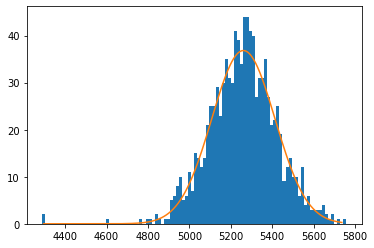

In [25]:
proc_calibration(10, 100, [5300, 170, 10000])

In [26]:
energy_mean= [mus[en] for en in energy]
energy_std = [delta_mus[en] for en in energy]

a = 0.527169862441736 +- 0.0003858168618472705
b = -5.535993790665735 +- 0.8733883940634701


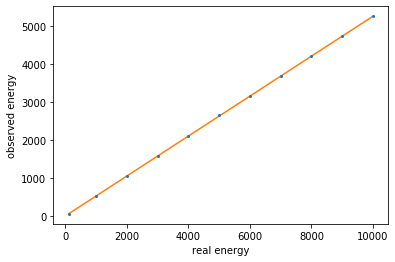

In [27]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [28]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [29]:
f = open("reduction_3.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [30]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]
sigmas = {}
delta_sigmas = {}

In [31]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 502.6526137473283 +- 2.2527444624095994
sigma = 62.817066324499756 +- 1.7712676858115763
nevents = 8754.81645041463 +- 306.20465632747795
mean = 499.59712909380175
std = 65.8483696931983




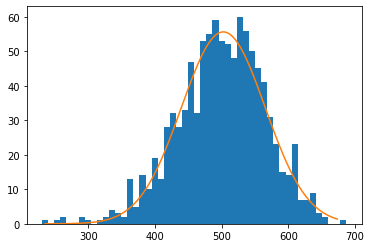

In [32]:
proc(0, 50, [500, 150, 10000])

mu = 1505.5066576368977 +- 3.95483805141588
sigma = 110.18792905691605 +- 3.107023495124769
nevents = 25592.827434357805 +- 901.4134196211651
mean = 1502.752514666413
std = 116.12939347718708




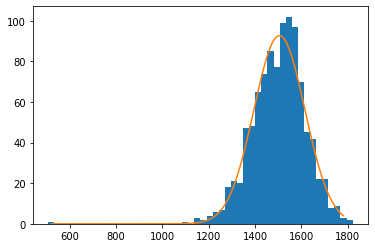

In [33]:
proc(1, 50, [1500, 200, 100000])

mu = 2500.6175948687373 +- 4.251934571770208
sigma = 144.2668545667117 +- 3.2427997265856465
nevents = 23441.510783144593 +- 678.2838341505557
mean = 2497.9690146005023
std = 146.81041434724892




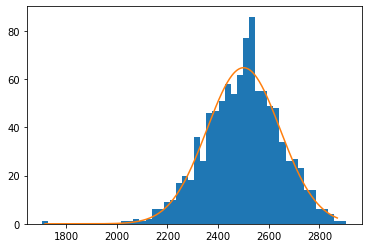

In [34]:
proc(2, 50, [2500, 300, 100000])

mu = 3494.7445388610267 +- 4.997672564561922
sigma = 169.85507725950384 +- 3.9684597107864166
nevents = 22840.87170972611 +- 662.4141531860599
mean = 3492.3934372939357
std = 174.05836455028853




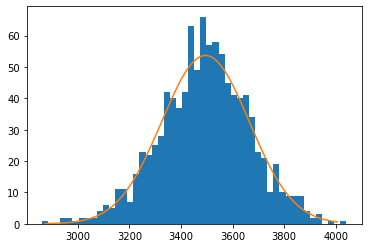

In [35]:
proc(3, 50, [3500, 400, 100000])

mu = 4501.619804948303 +- 5.963057968337806
sigma = 190.39519215030796 +- 4.491799329126884
nevents = 38016.00191895547 +- 1176.7867253481243
mean = 4497.472014426292
std = 206.84387934305434




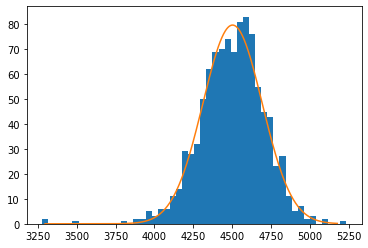

In [36]:
proc(4, 50, [4500, 500, 100000])

mu = 5489.129215324164 +- 7.727306131565519
sigma = 212.60156993299685 +- 5.972704708421694
nevents = 54397.49493210404 +- 1912.7459250884049
mean = 5487.767353222709
std = 233.05138566203115




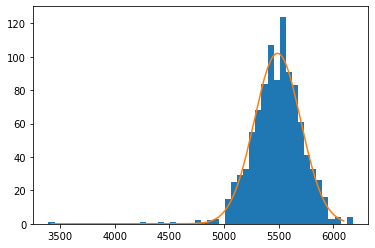

In [37]:
proc(5, 50, [5500, 500, 100000])

mu = 6486.751937439031 +- 7.894618638595171
sigma = 227.7203616444537 +- 5.619928107695367
nevents = 59896.72271398624 +- 2053.6115706915953
mean = 6480.079052713718
std = 248.69238731248004




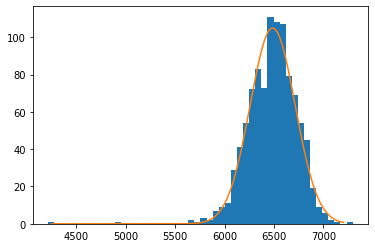

In [38]:
proc(6, 50, [6500, 500, 100000])

mu = 7469.91973033931 +- 9.095239494633583
sigma = 251.15069730009083 +- 6.909127320987328
nevents = 63670.53948988088 +- 2288.9741515176097
mean = 7463.037617169347
std = 279.8632013774945




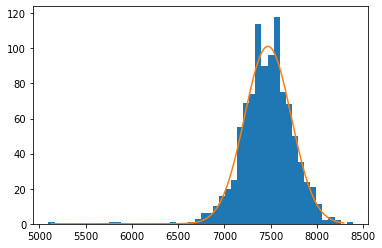

In [39]:
proc(7, 50, [7500, 600, 100000])

mu = 8480.037371384431 +- 8.765229856420579
sigma = 284.1785770680225 +- 6.789301214378442
nevents = 33173.98733111956 +- 998.7852651847945
mean = 8477.54492656454
std = 284.99353193906353




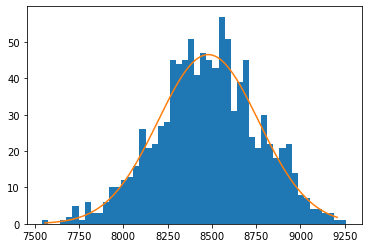

In [40]:
proc(8, 50, [8500, 500, 1000000])

mu = 9481.339132474448 +- 9.886907249277831
sigma = 286.2419093524344 +- 7.642435295334428
nevents = 50085.883186880674 +- 1676.7567543827452
mean = 9471.414801661786
std = 295.9314625470359




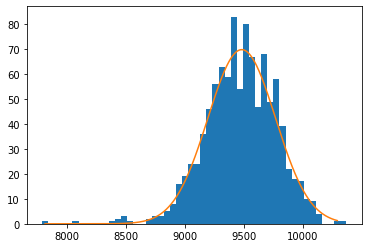

In [41]:
proc(9, 50, [9500, 700, 1000000])

In [42]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.001966327981481994 +- 0.0009638680464996301
b = 2.754079337097869 +- 0.06762550473418673


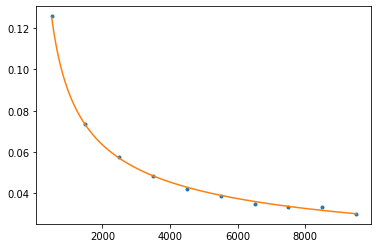

In [43]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [44]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()